In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCH=69

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantPotato",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

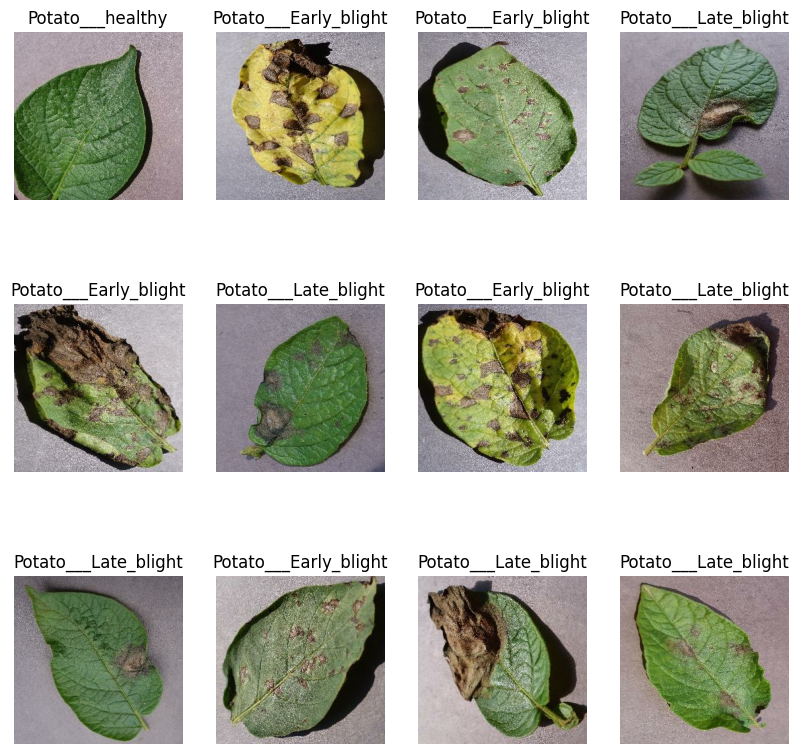

In [6]:
plt.figure(figsize=(10,10))
for image_batch,lable_batch in dataset.take(1):
     for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[lable_batch[i].numpy()])
        plt.axis('off')

In [7]:
# 80% ==> training
# 20% ==>(10%==>validation,10%==>test)

In [8]:
train_size=int(len(dataset)*0.8)
train_ds=dataset.take(train_size)
test_ds=dataset.skip(train_size)
len(train_ds)

54

In [9]:
len(test_ds)

14

In [10]:
val_size=int(len(dataset)*0.1)
val_ds=test_ds.take(val_size)
len(val_ds)

6

In [11]:
testf_ds=test_ds.skip(val_size)
len(testf_ds)

8

In [12]:
def partition_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    test_size=int(test_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(test_size)

    return train_ds,val_ds,test_ds

In [13]:
train_ds,val_ds,test_ds=partition_dataset(dataset)

In [14]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [15]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [16]:

resize_and_rescale = tf.keras.Sequential([
   tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
   tf.keras.layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your input shape
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Define the model
model = models.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape[1:]),  
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/69


c:\Users\Anshuman\Desktop\disease\training\penv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


54/54 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4479 - loss: 0.9439 - val_accuracy: 0.5052 - val_loss: 0.7765
Epoch 2/69
54/54 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6320 - loss: 0.7379 - val_accuracy: 0.7135 - val_loss: 0.6264
Epoch 3/69
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7365 - loss: 0.5665 - val_accuracy: 0.8646 - val_loss: 0.3794
Epoch 4/69
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8713 - loss: 0.3455 - val_accuracy: 0.8958 - val_loss: 0.2666
Epoch 5/69
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8768 - loss: 0.2918 - val_accuracy: 0.9427 - val_loss: 0.1307
Epoch 6/69
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 968ms/step - accuracy: 0.9300 - loss: 0.1988 - val_accuracy: 0.9271 - val_loss: 0.2678
Epoch 7/69
54/54 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9059 - loss: 0.2414 - val_accuracy: 0.8490 - val_loss: 0.5230
Epoch 8/69
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9218 - loss: 0.1999 - val_accuracy: 0.9219 - val_loss: 0.1887


In [18]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidance=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidance

In [19]:
model.save('my_model.keras')

In [20]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 245ms/step - accuracy: 1.0000 - loss: 0.0061


In [21]:
scores

[0.008723710663616657, 1.0]

In [22]:
history

In [23]:
history.params

{'verbose': 1, 'epochs': 69, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [25]:
len(history.history['accuracy'])

69

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

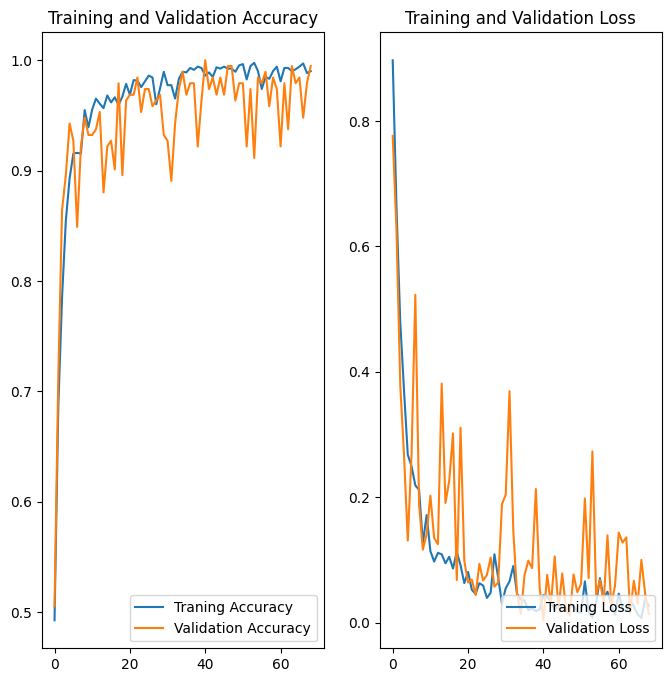

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH),acc,label='Traning Accuracy')
plt.plot(range(EPOCH),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCH),loss,label='Traning Loss')
plt.plot(range(EPOCH),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

first img to predict
first image's actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
Potato___Early_blight


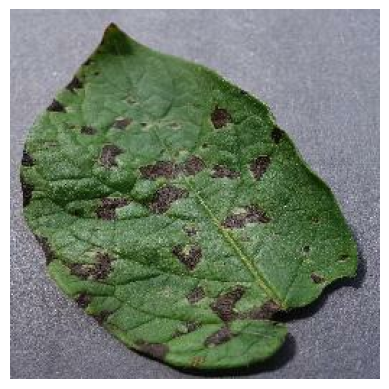

In [28]:
for image_batch,lable_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_lable=lable_batch[0].numpy()

    print("first img to predict")
    plt.axis('off')
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_lable])
    batch_prediction=model.predict(image_batch)
    index=(np.argmax(batch_prediction[0]))
    print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


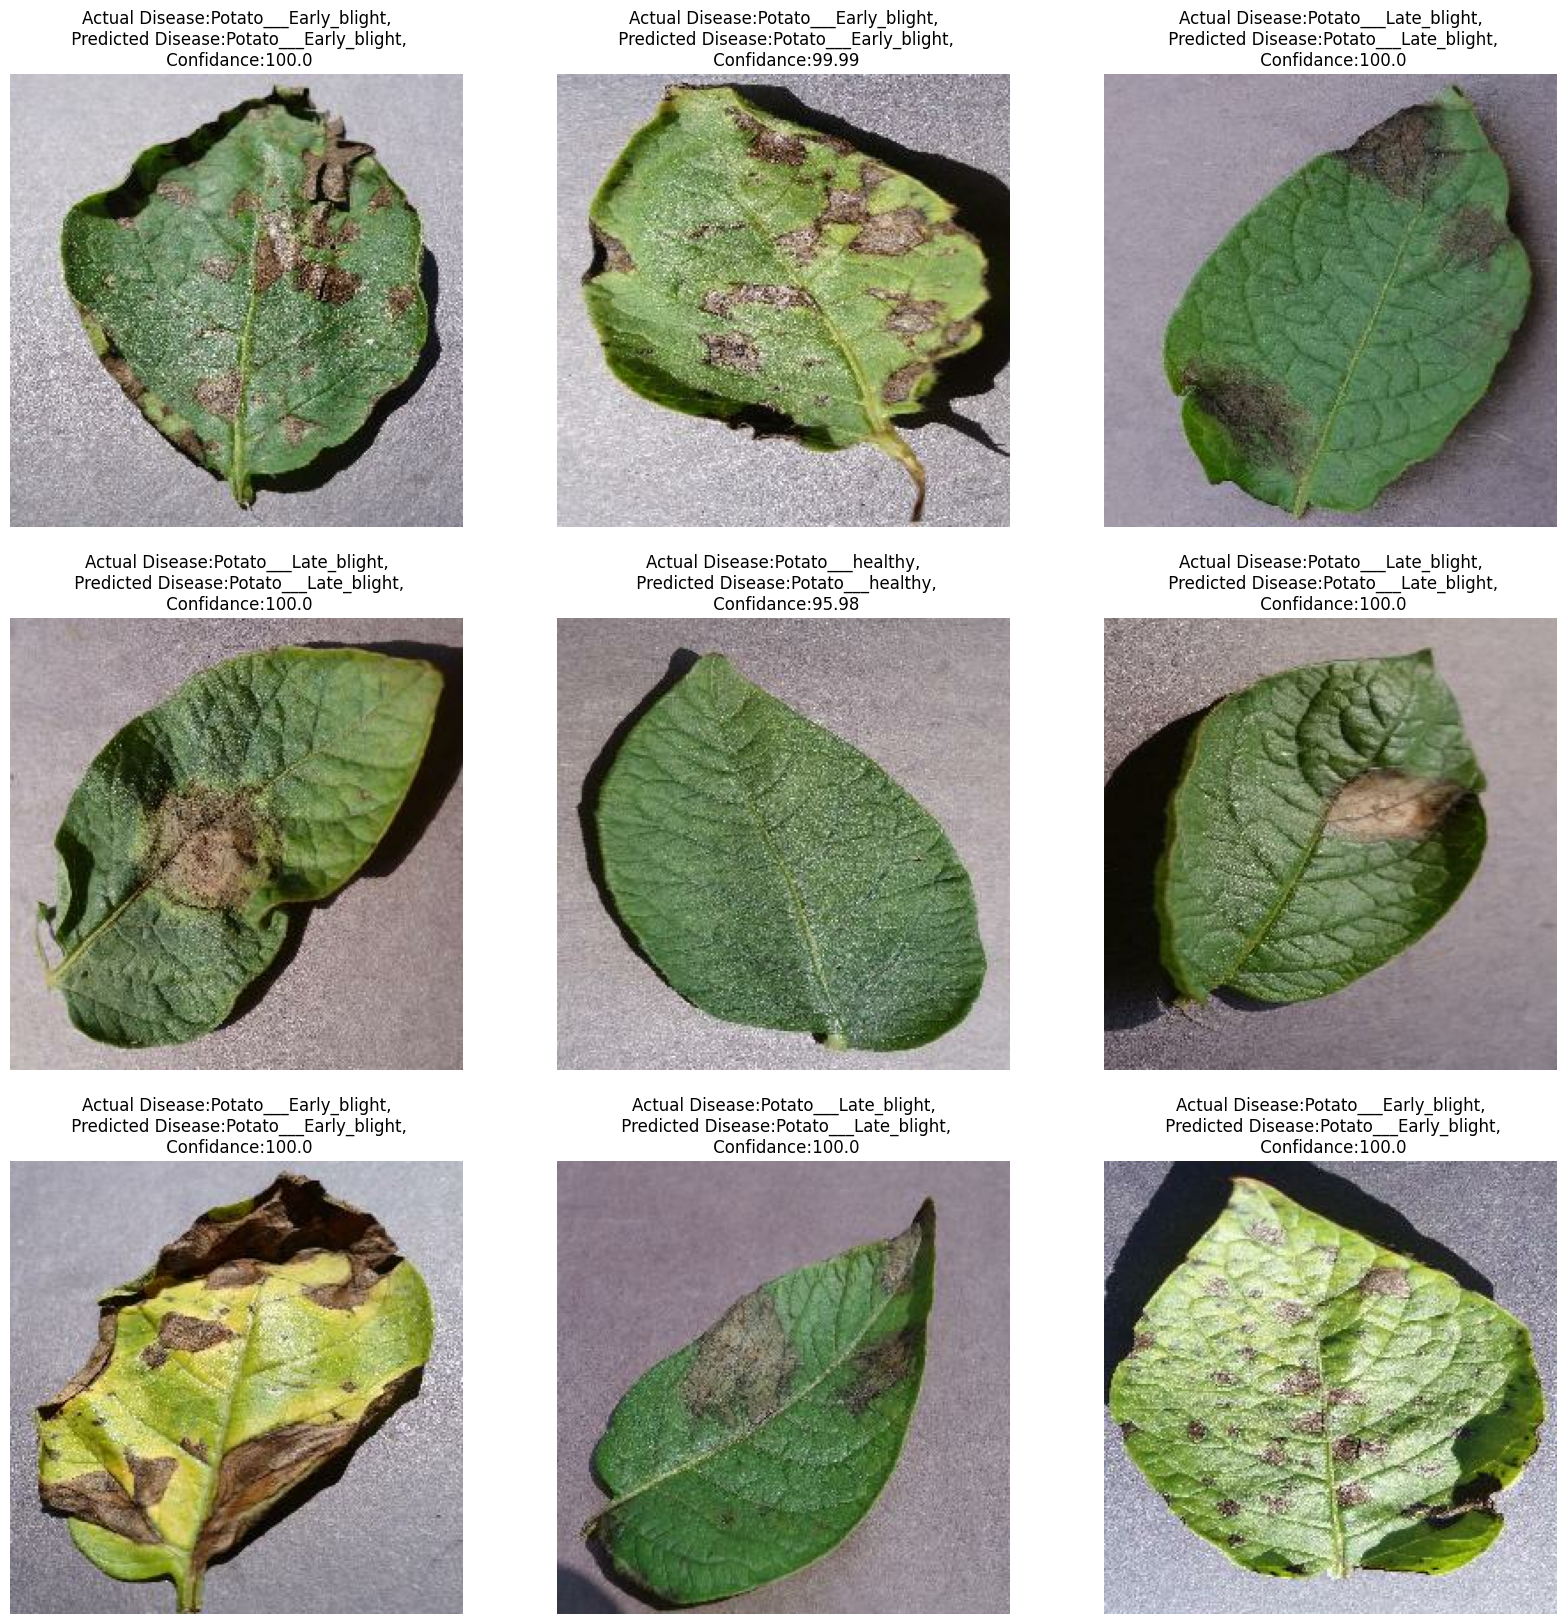

In [29]:
plt.figure(figsize=(20,20))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        actual_class=class_names[labels[i]]
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidance = predict(model,images[i])
        plt.title(f"Actual Disease:{actual_class},\n Predicted Disease:{predicted_class},\n Confidance:{confidance}")
        plt.axis('off')